#📌 Extracción

In [1]:
#Importamos librerías
import requests
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Accedemos a la "API" (archivo JSON en GitHub)
respuesta = requests.get(
    "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"
)

#Recuperamos el resultado
resultado = json.loads(respuesta.text)
#Convertimos de Json a DataFrame
df = pd.DataFrame(resultado)
#Vista Previa del DataFrame
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
#Obtenemos las columnas del DF
columnas = list(df.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

#🔧 Transformación

## **Normalizacion de las columnas anidadas**

In [4]:
# Normalizamos la columna 'customer'
customer_normalized = pd.json_normalize(df['customer'])

# Normalizamos la columna 'phone'
phone_normalized = pd.json_normalize(df['phone'])

# Normalizamos la columna 'internet'
internet_normalized = pd.json_normalize(df['internet'])

# Normalizamos la columna 'account'
account_normalized = pd.json_normalize(df['account'])

# Concatenamos todo con el DataFrame original, eliminando las columnas anidadas
df = pd.concat(
    [df.drop(columns=['customer', 'phone', 'internet', 'account']),
     customer_normalized,
     phone_normalized,
     internet_normalized,
     account_normalized],
    axis=1
)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
#Actualizamos las columnas del DF
columnas = list(df.columns)
columnas

['customerID',
 'Churn',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Charges.Monthly',
 'Charges.Total']

##**Exploramos Tipos de Datos de cada columna**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [7]:
df.info()
#Validamos que no existan datos nulos
df.isnull().sum()
#Ningun dato es nulo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [8]:
columnas_texto=['customerID','Churn','gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
columnas_numericas=['SeniorCitizen','tenure','Charges.Monthly','Charges.Total']
#Validamos NAN
df[columnas_numericas].isna().sum()
#No se encontro NaN

,0
SeniorCitizen,0
tenure,0
Charges.Monthly,0
Charges.Total,0


In [9]:
#Validamos Cadenas vacias
df[columnas_texto].apply(lambda x: (x.str.strip() == '').sum())
#En Churn se encontró	224 celdas vacias

,0
customerID,0
Churn,224
gender,0
Partner,0
Dependents,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [10]:
#Revisamos la frecuecia mayor para reemplazar los valores vacios
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869
,224


In [11]:
# Reemplamos las cadenas vacías en la columna "Churn" por "0" usando .loc
df.loc[df['Churn'] == '', 'Churn'] = 'No'
df['Churn'].value_counts()

,count
Churn,
No,5398
Yes,1869


In [12]:
# Lista de columnas a convertir
yes_no_columns = ['Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']  # reemplaza con tus columnas

# Convertimos Yes/No a 1/0
df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0})
df.head()

/tmp/ipython-input-2043553961.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[yes_no_columns] = df[yes_no_columns].replace({'Yes': 1, 'No': 0})


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.4


In [13]:
# Intentar convertir la columna a float y capturar errores
try:
    df['Charges.Total'] = df['Charges.Total'].astype(np.float64)
    print("Conversión exitosa a float.")
except ValueError as e:
    print("Error en la conversión: ", e)

Error en la conversión:  could not convert string to float: ' '


In [14]:
# Reemplaza cadenas vacías o solo espacios por NaN
df['Charges.Total'] = df['Charges.Total'].replace(r'^\s*$', np.nan, regex=True)

In [15]:
# Intentar Nuevamente convertir la columna a float y capturar errores
try:
    df['Charges.Total'] = df['Charges.Total'].astype(np.float64)
    print("Conversión exitosa a float.")
except ValueError as e:
    print("Error en la conversión: ", e)

Conversión exitosa a float.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   int64  
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   int64  
 5   Dependents        7267 non-null   int64  
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   int64  
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [17]:
# Ahora que no tenemos columnas conflictivas creamos la nueva columna "Cuentas_Diarias"
df['Cuentas_Diarias'] = df['Charges.Total'] / 30
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,19.776667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,18.080000
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,9.361667
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,41.261667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,8.913333


#📊 Carga y análisis

In [18]:
#análisis descriptivo
df.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7256.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.593230,64.720098,2280.634213,76.021140
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.491265,30.129572,2268.632997,75.621100
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.626667
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.425000,400.225000,13.340833
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.300000,1391.000000,46.366667
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.875000,3785.300000,126.176667
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,289.493333


/tmp/ipython-input-3872834239.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


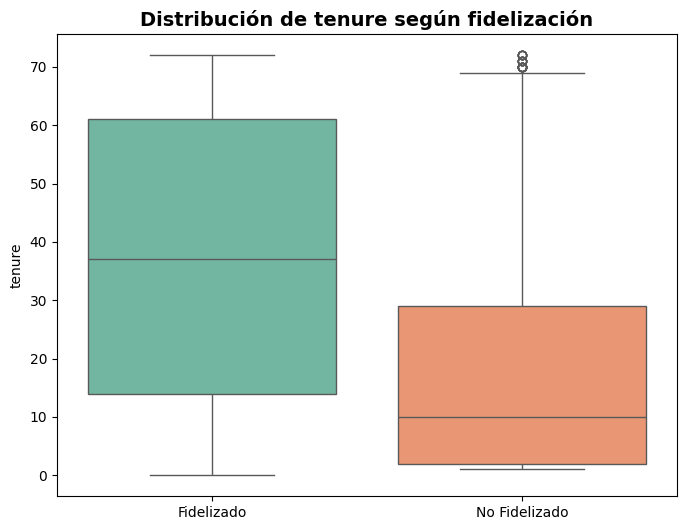

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variable numérica a analizar, por ejemplo Tenure
variable = 'tenure'
colors = ['#66c2a5', '#fc8d62']  # Fidelizado, No Fidelizado

plt.figure(figsize=(8,6))
sns.boxplot(
    data=df,
    x='Churn',
    y=variable,
    palette=colors
)

# Etiquetas en español
plt.xticks([0,1], ['Fidelizado', 'No Fidelizado'])
plt.title(f'Distribución de {variable} según fidelización', fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel(variable)

plt.show()



##**Perdida total de clientes**##

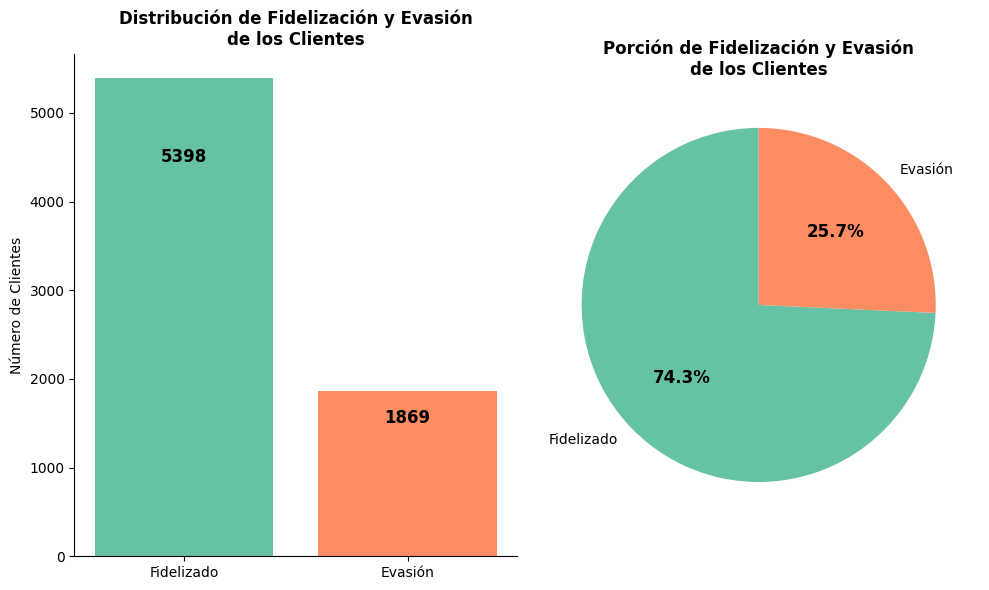

In [20]:
# Contar y calcular proporciones (sin cambiar el DF)
evasion_counts = df["Churn"].value_counts().sort_index()
evasion_props = df["Churn"].value_counts(normalize=True).sort_index()
colors = sns.color_palette("Set2")

fig, axs = plt.subplots(1, 2, figsize=(10, 6))

# --- Gráfico de barras ---
bars = axs[0].bar(
    evasion_counts.index.map({0: 'Fidelizado', 1: 'Evasión'}),
    evasion_counts.values,
    color=colors
)

# Quitar marco superior y derecho
for ax in axs.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axs[0].set_title('Distribución de Fidelización y Evasión\nde los Clientes', fontsize=12, weight='bold', loc='center')
axs[0].set_ylabel('Número de Clientes')

# Texto dentro de las barras
for bar in bars:
    height = bar.get_height()
    axs[0].text(
        bar.get_x() + bar.get_width() / 2,
        height / 1.2,
        f'{height:.0f}',
        ha='center',
        va='center',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

axs[0].grid(False)

# --- Gráfico de pastel ---
def custom_autopct(pct):
    return f'{pct:.1f}%'

wedges, texts, autotexts = axs[1].pie(
    evasion_counts.values,
    labels=evasion_counts.index.map({0: 'Fidelizado', 1: 'Evasión'}),
    autopct=custom_autopct,
    startangle=90,
    colors=colors,
    textprops={'fontsize': 10}
)

for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

axs[1].set_title('Porción de Fidelización y Evasión\nde los Clientes', fontsize=12, weight='bold', loc='center')

plt.tight_layout()
plt.show()



/tmp/ipython-input-1971722826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1971722826.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Fidelizado', 'No Fidelizado'])
/tmp/ipython-input-1971722826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-1971722826.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(['Fidelizado', 'No Fidelizado'])
/tmp/ipython-input-1971722826.py:8: FutureWarning: 

Passing `palette` without assig

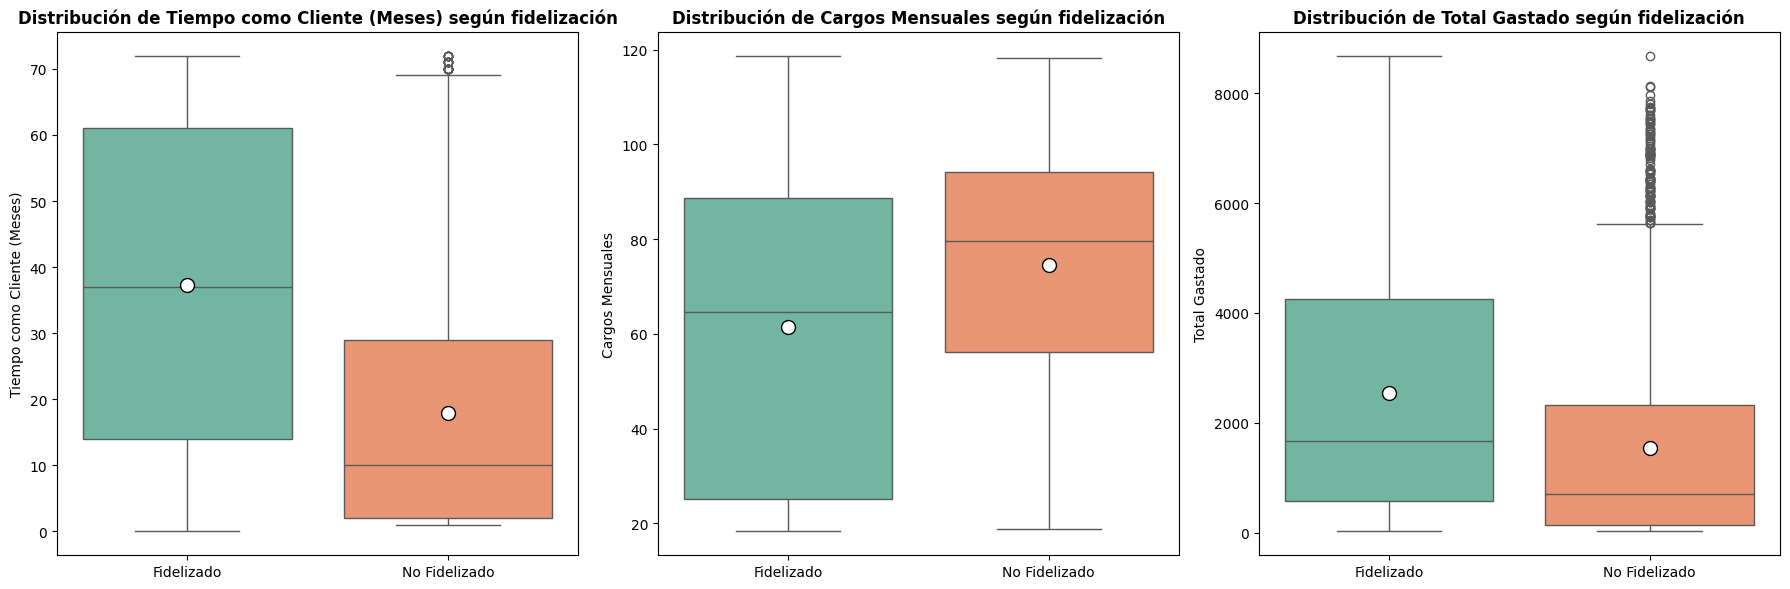

In [21]:
# Variables numéricas a analizar
variables = ['tenure', 'Charges.Monthly', 'Charges.Total']
colores = ['#66c2a5', '#fc8d62']  # Fidelizado, No Fidelizado

fig, axes = plt.subplots(1, len(variables), figsize=(18,6))

for i, var in enumerate(variables):
    sns.boxplot(
        data=df,
        x='Churn',
        y=var,
        palette=colores,
        showmeans=True,
        meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":10},
        ax=axes[i]
    )

    # Etiquetas X en español
    axes[i].set_xticklabels(['Fidelizado', 'No Fidelizado'])

    # Nombre de la variable en español
    nombre_var = var
    if var == 'tenure':
        nombre_var = 'Tiempo como Cliente (Meses)'
    elif var == 'Charges.Monthly':
        nombre_var = 'Cargos Mensuales'
    elif var == 'Charges.Total':
        nombre_var = 'Total Gastado'

    # Título y etiqueta Y en español
    axes[i].set_title(f'Distribución de {nombre_var} según fidelización', fontsize=12, weight='bold')
    axes[i].set_ylabel(nombre_var)
    axes[i].set_xlabel('')  # Dejar X vacío

plt.tight_layout()
plt.show()


##**Evasion segun variables categoricas**

/tmp/ipython-input-1648764119.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels)
/tmp/ipython-input-1648764119.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels)
/tmp/ipython-input-1648764119.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels)
/tmp/ipython-input-1648764119.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels)
/tmp/ipython-input-1648764119.py:48: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(labels)
/tmp/

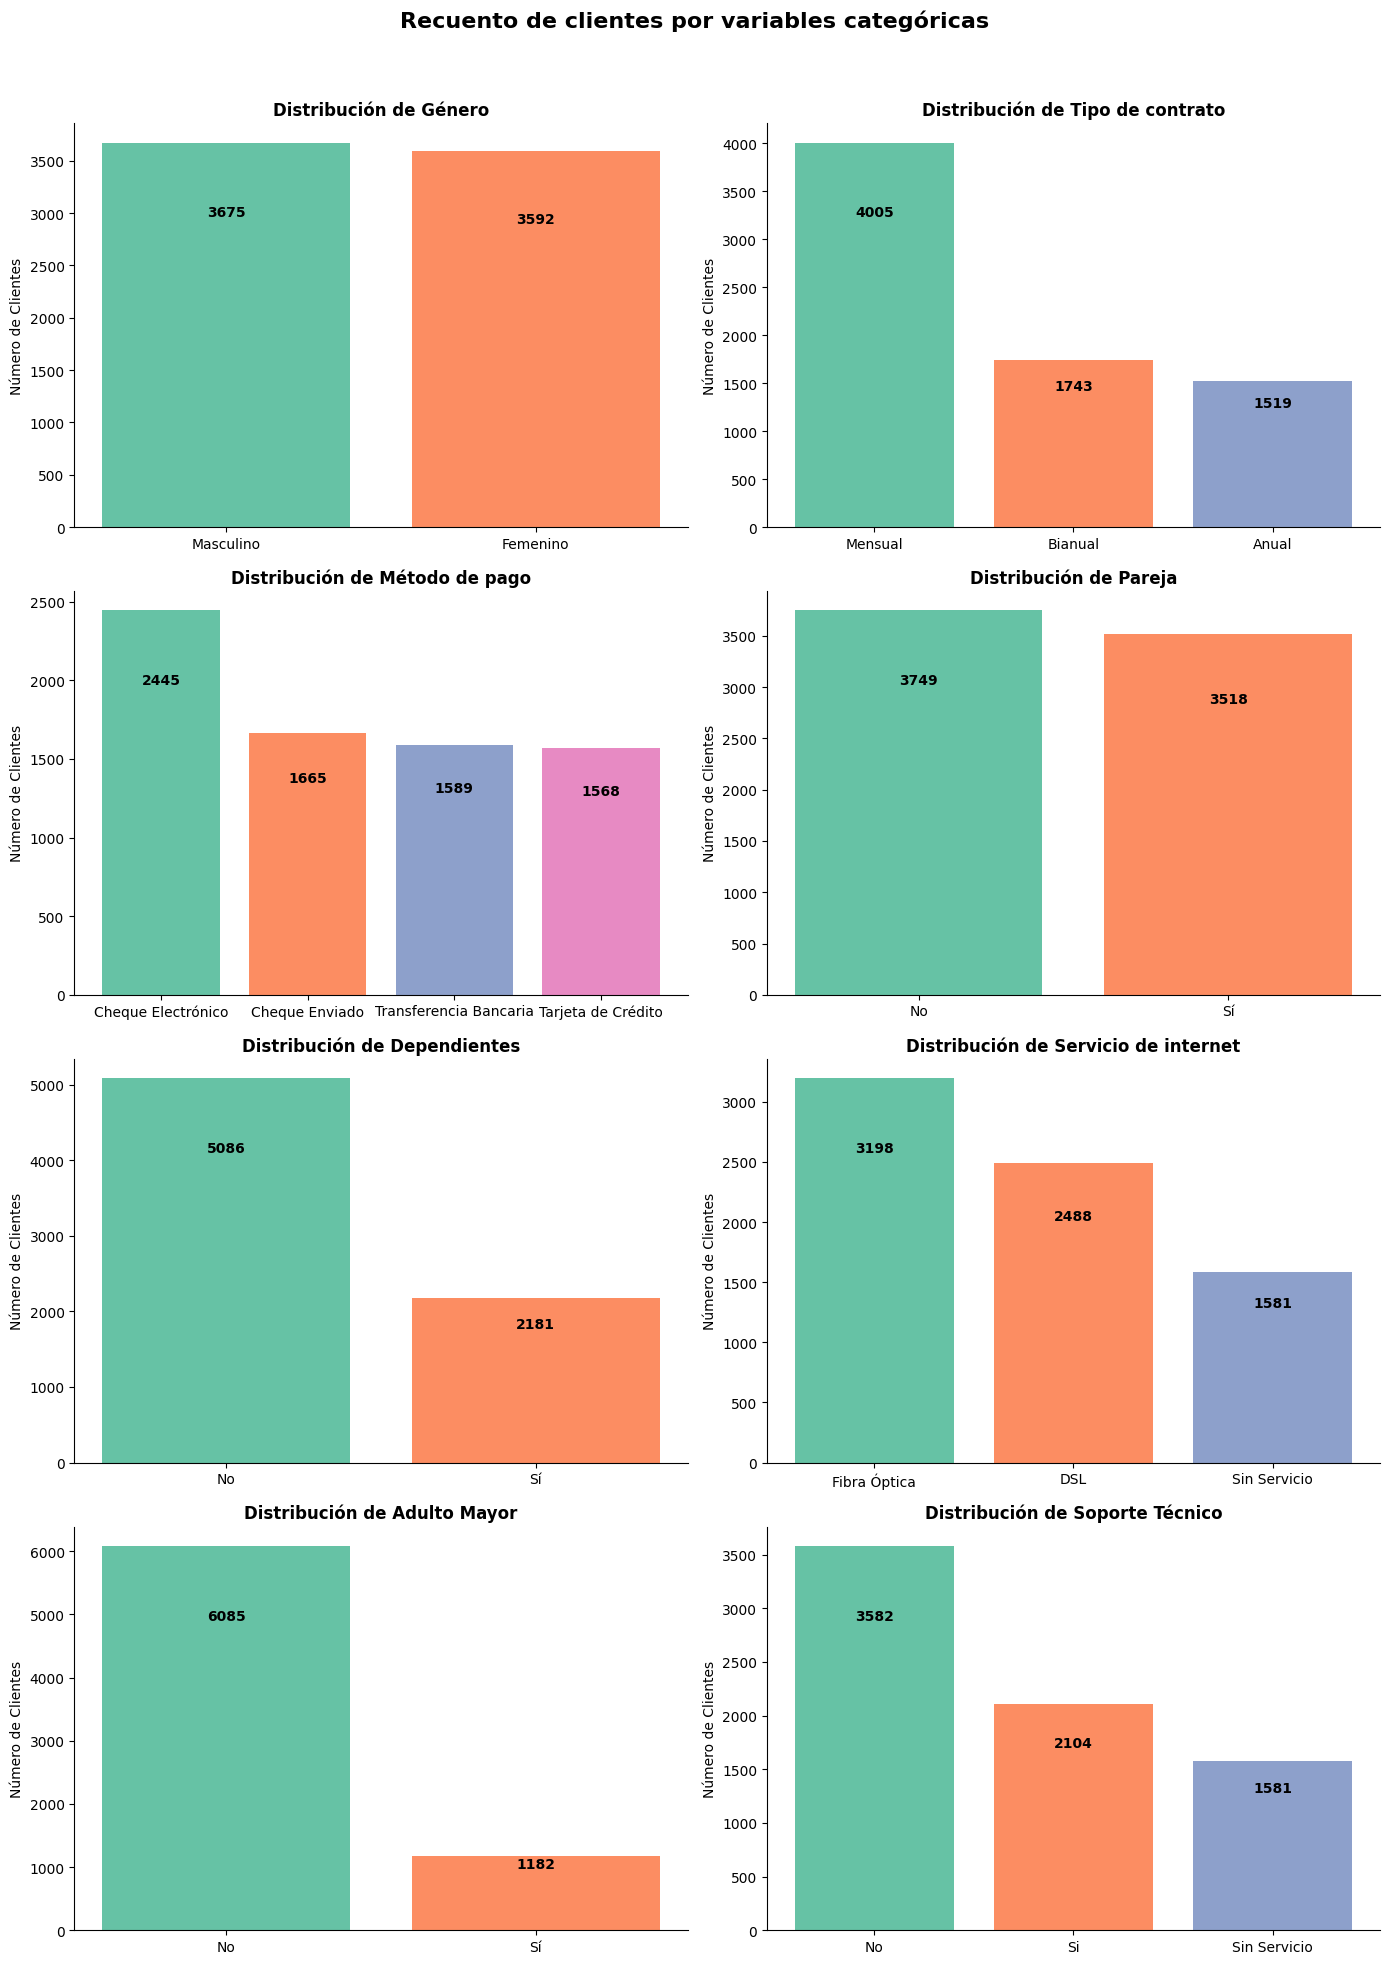

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

column_mapping = {
    'gender': 'Género',
    'Contract': 'Tipo de contrato',
    'PaymentMethod': 'Método de pago',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'InternetService': 'Servicio de internet',
    'SeniorCitizen': 'Adulto Mayor',
    'TechSupport': 'Soporte Técnico'
}

categoricas = ['gender', 'Contract', 'PaymentMethod', 'Partner', 'Dependents', 'InternetService', 'SeniorCitizen', 'TechSupport']
colors = sns.color_palette("Set2")

# Configuración de subplots: 2 columnas por fila
fig, axes = plt.subplots(nrows=(len(categoricas) + 1) // 2, ncols=2, figsize=(14, 20))
axes = axes.flatten()

for i, cat in enumerate(categoricas):
    counts = df[cat].value_counts()

    # Dibujar gráfico
    axes[i].bar(counts.index.astype(str), counts.values, color=colors)

    # Labels personalizados según la columna
    if cat == 'gender':
        labels = counts.index.map({'Female': 'Femenino', 'Male': 'Masculino'})
        axes[i].set_xticklabels(labels)
    elif cat == 'Contract':
        labels = counts.index.map({'Month-to-month': 'Mensual',
                                   'One year': 'Anual',
                                   'Two year': 'Bianual'})
        axes[i].set_xticklabels(labels)
    elif cat == 'PaymentMethod':
        labels = counts.index.map({
            'Electronic check': 'Cheque Electrónico',
            'Mailed check': 'Cheque Enviado',
            'Bank transfer (automatic)': 'Transferencia Bancaria',
            'Credit card (automatic)': 'Tarjeta de Crédito'
        })
        axes[i].set_xticklabels(labels)
    elif cat == 'Partner' or cat == 'Dependents' or cat == 'SeniorCitizen': # or cat == 'TechSupport'
        labels = counts.index.map({0: 'No', 1: 'Sí'})
        axes[i].set_xticklabels(labels)
    elif cat == 'InternetService':
        labels = counts.index.map({'Fiber optic': 'Fibra Óptica',
                                   'DSL': 'DSL',
                                   'No': 'Sin Servicio'})
        axes[i].set_xticklabels(labels)
    elif cat == 'TechSupport':
        labels = counts.index.map({'No': 'No',
                                    'Yes': 'Si',
                                    'No internet service': 'Sin Servicio'})
        axes[i].set_xticklabels(labels)

    # Estilo del gráfico
    axes[i].set_title(f'Distribución de {column_mapping[cat]}', fontsize=12, weight='bold')
    axes[i].set_ylabel('Número de Clientes')
    axes[i].tick_params(axis='x', rotation=0)

    # Texto con valores dentro de las barras
    for j, val in enumerate(counts.values):
        axes[i].text(j, val * 0.80, f'{val}', ha='center', va='bottom', fontsize=10, fontweight='bold')

    # Quitar marco superior y derecho
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)

plt.suptitle('Recuento de clientes por variables categóricas', fontsize=16, weight='bold', ha='center')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



##**Fidelización segun Cada Variable Categórica**

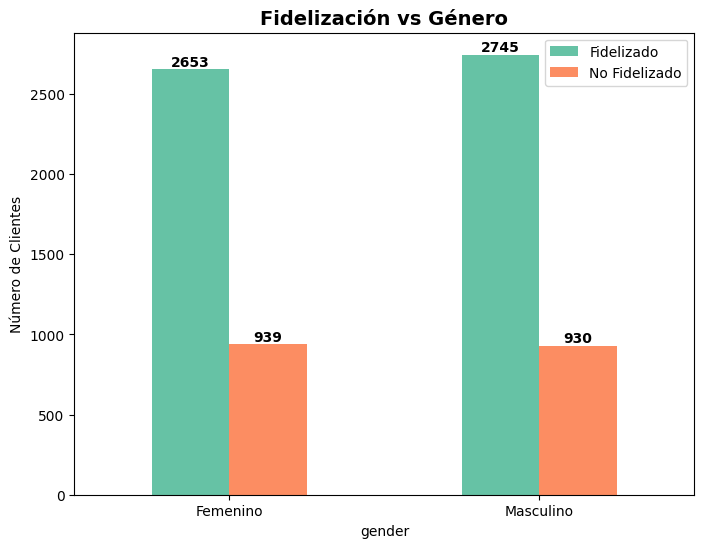

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2")

# Crear tabla cruzada: Género vs Fidelización
cruzado = pd.crosstab(df['gender'], df['Churn'])

# Graficar barras agrupadas
ax = cruzado.plot(
    kind='bar',
    color=[colors[0], colors[1]],
    figsize=(8,6)
)

# Cambiar labels del eje X a español
ax.set_xticklabels(['Femenino', 'Masculino'], rotation=0)
ax.set_ylabel('Número de Clientes')
ax.set_title('Fidelización vs Género', fontsize=14, weight='bold')

# Agregar valores encima de las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.legend(['Fidelizado', 'No Fidelizado'])
plt.show()

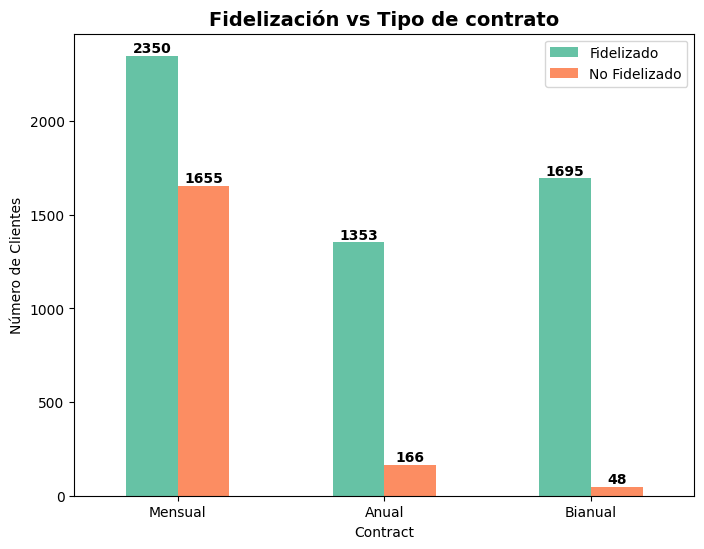

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2")

# Crear tabla cruzada: Tipo de contrato vs Fidelización
cruzado = pd.crosstab(df['Contract'], df['Churn'])

# Graficar barras agrupadas
ax = cruzado.plot(
    kind='bar',
    color=[colors[0], colors[1]],
    figsize=(8,6)
)

# Cambiar labels del eje X a español
ax.set_xticklabels(['Mensual', 'Anual', 'Bianual'], rotation=0)
ax.set_ylabel('Número de Clientes')
ax.set_title('Fidelización vs Tipo de contrato', fontsize=14, weight='bold')

# Agregar valores encima de las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.legend(['Fidelizado', 'No Fidelizado'])
plt.show()


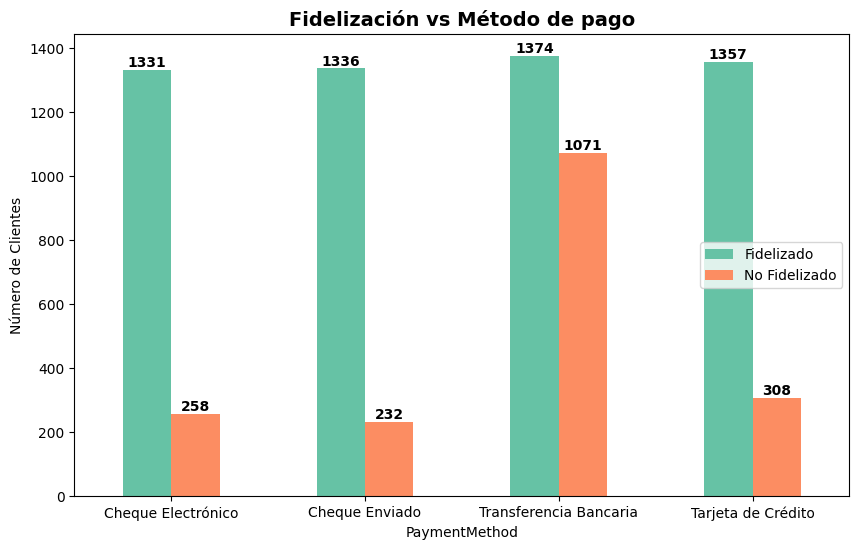

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2")

# Tabla cruzada: Método de pago vs Fidelización
cruzado = pd.crosstab(df['PaymentMethod'], df['Churn'])

# Graficar barras agrupadas
ax = cruzado.plot(
    kind='bar',
    color=[colors[0], colors[1]],
    figsize=(10,6)
)

# Labels en español
ax.set_xticklabels(['Cheque Electrónico', 'Cheque Enviado', 'Transferencia Bancaria', 'Tarjeta de Crédito'], rotation=0)
ax.set_ylabel('Número de Clientes')
ax.set_title('Fidelización vs Método de pago', fontsize=14, weight='bold')

# Agregar valores encima de las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.legend(['Fidelizado', 'No Fidelizado'])
plt.show()


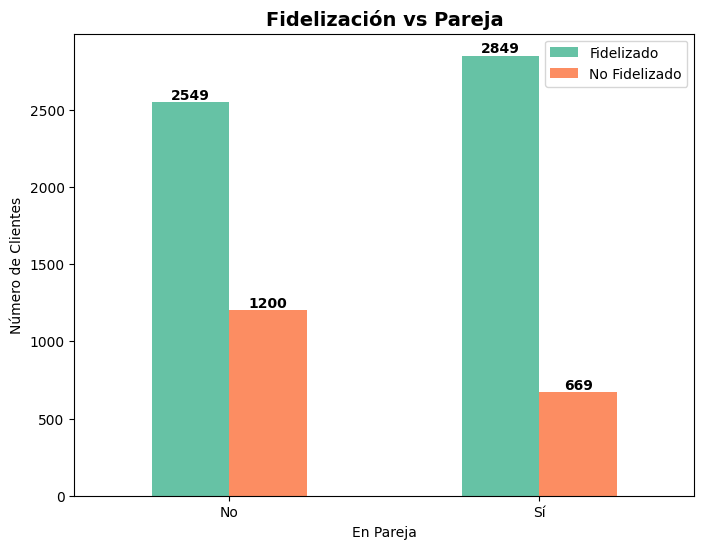

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2")

# Tabla cruzada: Pareja vs Fidelización
cruzado = pd.crosstab(df['Partner'], df['Churn'])

# Graficar barras agrupadas
ax = cruzado.plot(
    kind='bar',
    color=[colors[0], colors[1]],
    figsize=(8,6)
)

# Labels en español
ax.set_xticklabels(['No', 'Sí'], rotation=0)
ax.set_ylabel('Número de Clientes')
ax.set_xlabel("En Pareja")
ax.set_title('Fidelización vs Pareja', fontsize=14, weight='bold')

# Agregar valores encima de las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.legend(['Fidelizado', 'No Fidelizado'])
plt.show()

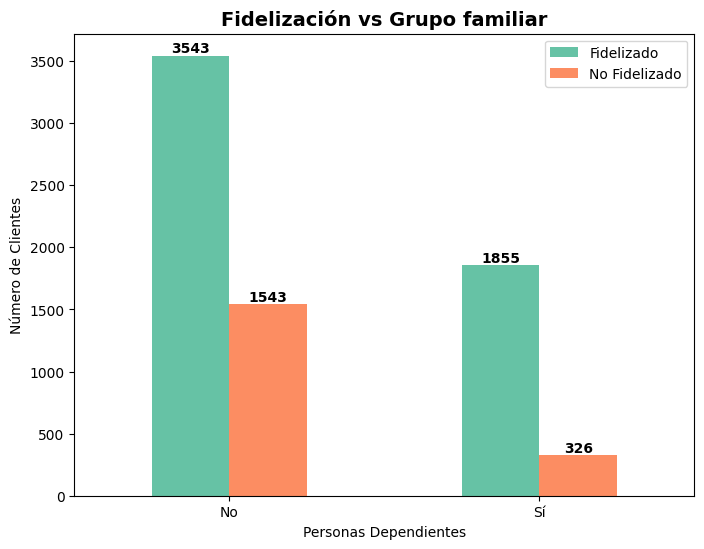

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2")

# Tabla cruzada: Dependientes vs Fidelización
cruzado = pd.crosstab(df['Dependents'], df['Churn'])

# Graficar barras agrupadas
ax = cruzado.plot(
    kind='bar',
    color=[colors[0], colors[1]],
    figsize=(8,6)
)

# Labels en español
ax.set_xticklabels(['No', 'Sí'], rotation=0)
ax.set_ylabel('Número de Clientes')
ax.set_xlabel("Personas Dependientes")
ax.set_title('Fidelización vs Grupo familiar', fontsize=14, weight='bold')

# Agregar valores encima de las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.legend(['Fidelizado', 'No Fidelizado'])
plt.show()

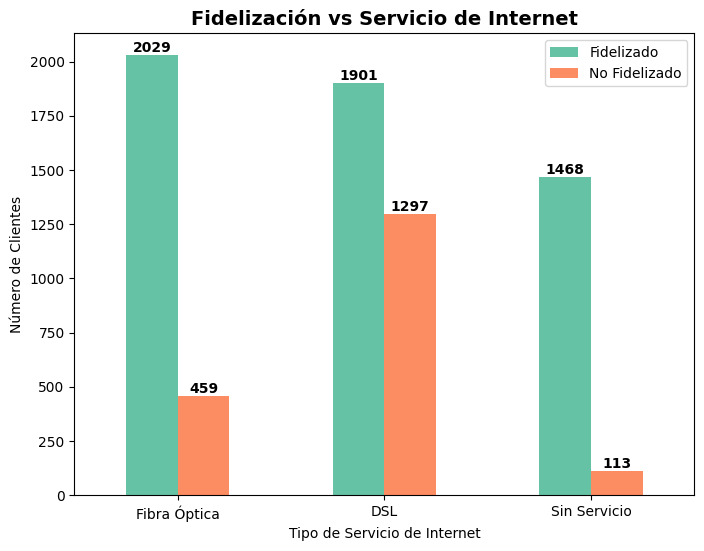

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = sns.color_palette("Set2")

# Tabla cruzada: Servicio de Internet vs Fidelización
cruzado = pd.crosstab(df['InternetService'], df['Churn'])

# Graficar barras agrupadas
ax = cruzado.plot(
    kind='bar',
    color=[colors[0], colors[1]],
    figsize=(8,6)
)

# Labels en español
ax.set_xticklabels(['Fibra Óptica', 'DSL', 'Sin Servicio'], rotation=0)
ax.set_ylabel('Número de Clientes')
ax.set_xlabel("Tipo de Servicio de Internet")
ax.set_title('Fidelización vs Servicio de Internet', fontsize=14, weight='bold')

# Agregar valores encima de las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.legend(['Fidelizado', 'No Fidelizado'])
plt.show()

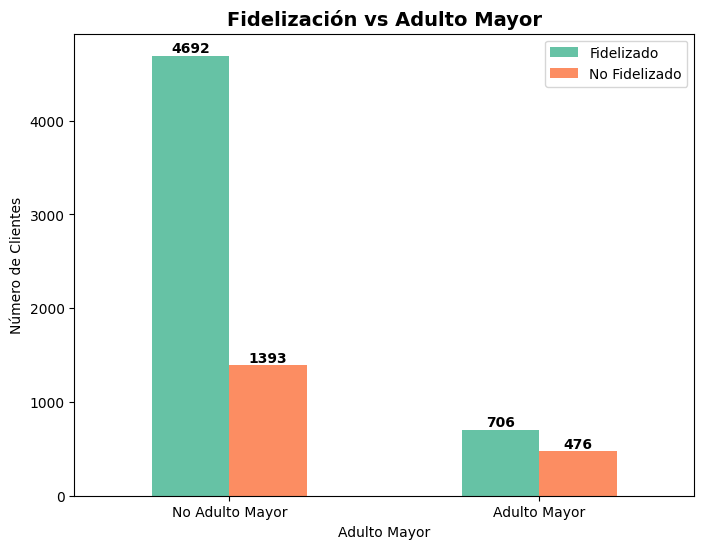

In [29]:
#Fidelización vs Adulto Mayor (SeniorCitizen)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

colors = sns.color_palette("Set2")

# Tabla cruzada y orden/llenado seguro
cruzado = (
    pd.crosstab(df['SeniorCitizen'], df['Churn'])
      .reindex(index=[0, 1], columns=[0, 1], fill_value=0)
)

# Barras agrupadas
ax = cruzado.plot(
    kind='bar',
    color=[colors[0], colors[1]],
    figsize=(8, 6)
)

# Labels en español
ax.set_xticklabels(['No Adulto Mayor', 'Adulto Mayor'], rotation=0)
ax.set_ylabel('Número de Clientes')
ax.set_xlabel("Adulto Mayor")
ax.set_title('Fidelización vs Adulto Mayor', fontsize=14, weight='bold')

# Anotar valores
for p in ax.patches:
    h = p.get_height()
    ax.annotate(str(int(h)),
                (p.get_x() + p.get_width()/2., h),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.legend(['Fidelizado', 'No Fidelizado'])
plt.show()

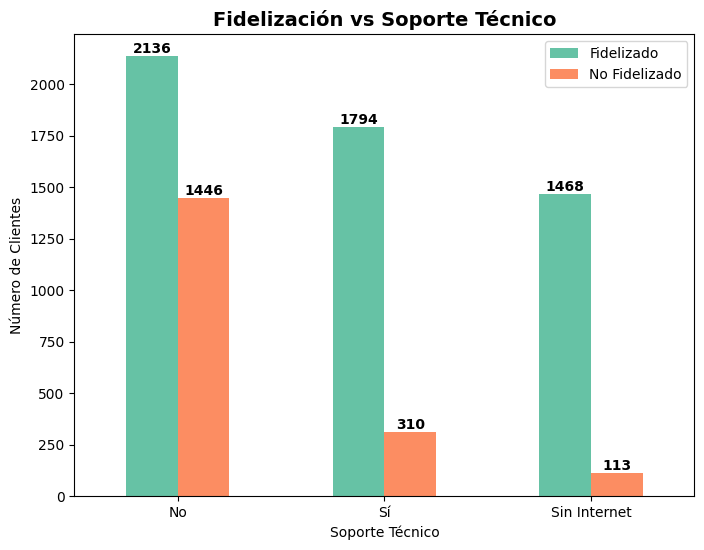

In [30]:
# --- Fidelización vs Soporte Técnico (TechSupport) ---
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

colors = sns.color_palette("Set2")

# Tabla cruzada ordenando categorías y columnas; llenar faltantes con 0
orden_idx = ['No', 'Yes', 'No internet service']
cruzado = (
    pd.crosstab(df['TechSupport'], df['Churn'])
      .reindex(index=orden_idx, columns=[0, 1], fill_value=0)
)

# Barras agrupadas
ax = cruzado.plot(
    kind='bar',
    color=[colors[0], colors[1]],
    figsize=(8, 6)
)

# Labels en español
ax.set_xticklabels(['No', 'Sí', 'Sin Internet'], rotation=0)
ax.set_ylabel('Número de Clientes')
ax.set_xlabel("Soporte Técnico")
ax.set_title('Fidelización vs Soporte Técnico', fontsize=14, weight='bold')

# Anotar valores
for p in ax.patches:
    h = p.get_height()
    ax.annotate(str(int(h)),
                (p.get_x() + p.get_width()/2., h),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

ax.legend(['Fidelizado', 'No Fidelizado'])
plt.show()

**Las graficas anteriores proporcionan variaciones considerables en todas excepto en la grafica de genero, la cual no denota ninguna tendencia significativa.**
Procederemos a realizar graficas de calor con Categorias cruzadas

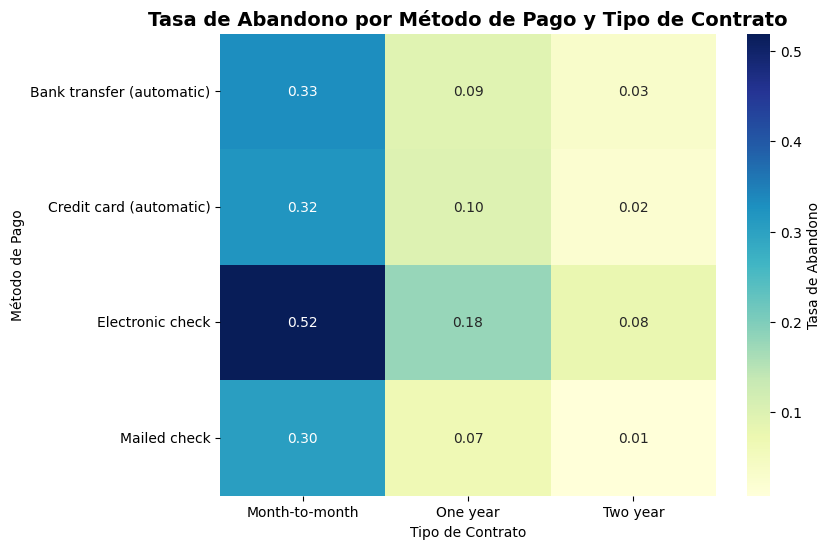

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Tabla cruzada con proporción de clientes que se fueron (Churn=1)
tabla = pd.crosstab(df['PaymentMethod'], df['Contract'],
                    values=df['Churn'], aggfunc='mean')

plt.figure(figsize=(8,6))
sns.heatmap(tabla, annot=True, fmt=".2f", cmap="YlGnBu", cbar_kws={'label': 'Tasa de Abandono'})

plt.title("Tasa de Abandono por Método de Pago y Tipo de Contrato", fontsize=14, weight="bold")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Método de Pago")
plt.show()


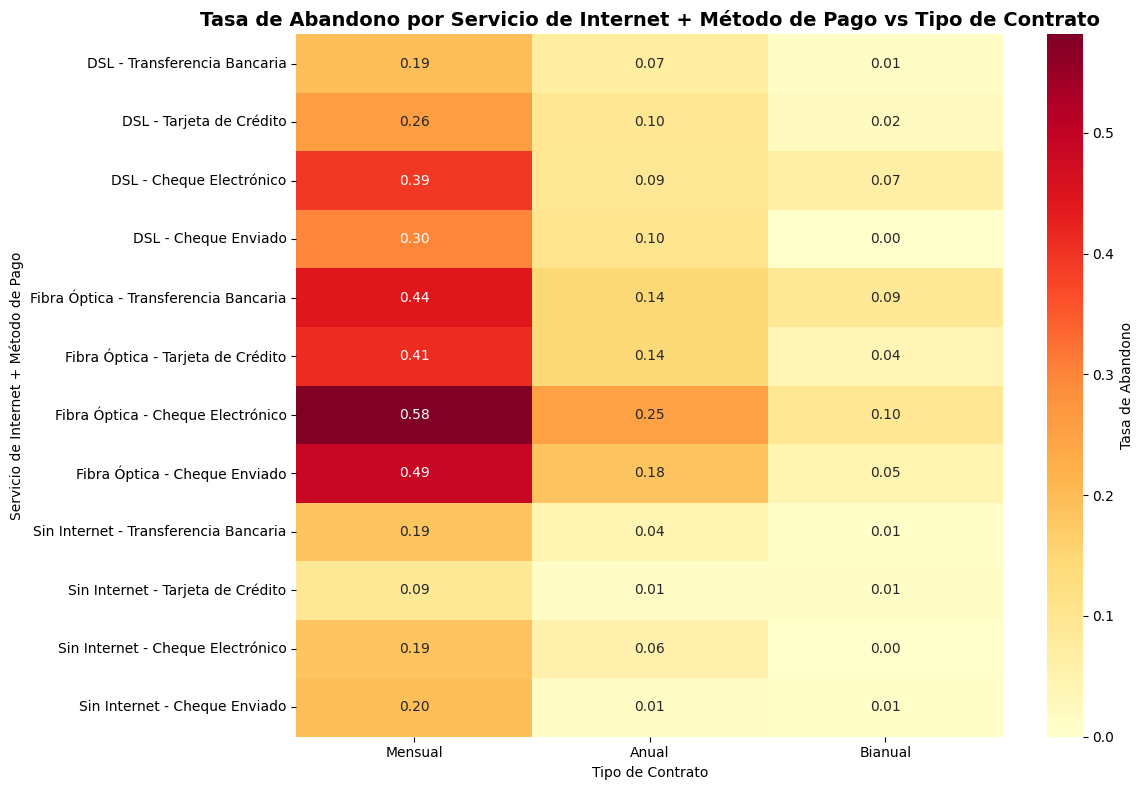

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Tabla cruzada combinando Servicio de Internet + Método de Pago vs Tipo de Contrato
tabla = pd.crosstab(
    [df['InternetService'], df['PaymentMethod']],   # Eje Y: combinación
    df['Contract'],                                # Eje X: contrato
    values=df['Churn'],
    aggfunc='mean'                                 # tasa de abandono promedio
)

# Traducir labels al español
tabla.index = [f"{internet} - {pago}" for internet, pago in tabla.index]

tabla.index = (tabla.index.str.replace('Fiber optic', 'Fibra Óptica')
                          .str.replace('DSL', 'DSL')
                          .str.replace('No', 'Sin Internet')
                          .str.replace('Electronic check', 'Cheque Electrónico')
                          .str.replace('Mailed check', 'Cheque Enviado')
                          .str.replace('Bank transfer (automatic)', 'Transferencia Bancaria')
                          .str.replace('Credit card (automatic)', 'Tarjeta de Crédito'))

tabla.columns = (tabla.columns.str.replace('Month-to-month', 'Mensual')
                                .str.replace('One year', 'Anual')
                                .str.replace('Two year', 'Bianual'))

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(tabla, annot=True, fmt=".2f", cmap="YlOrRd",
            cbar_kws={'label': 'Tasa de Abandono'})
plt.title("Tasa de Abandono por Servicio de Internet + Método de Pago vs Tipo de Contrato",
          fontsize=14, weight="bold")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Servicio de Internet + Método de Pago")
plt.tight_layout()
plt.show()

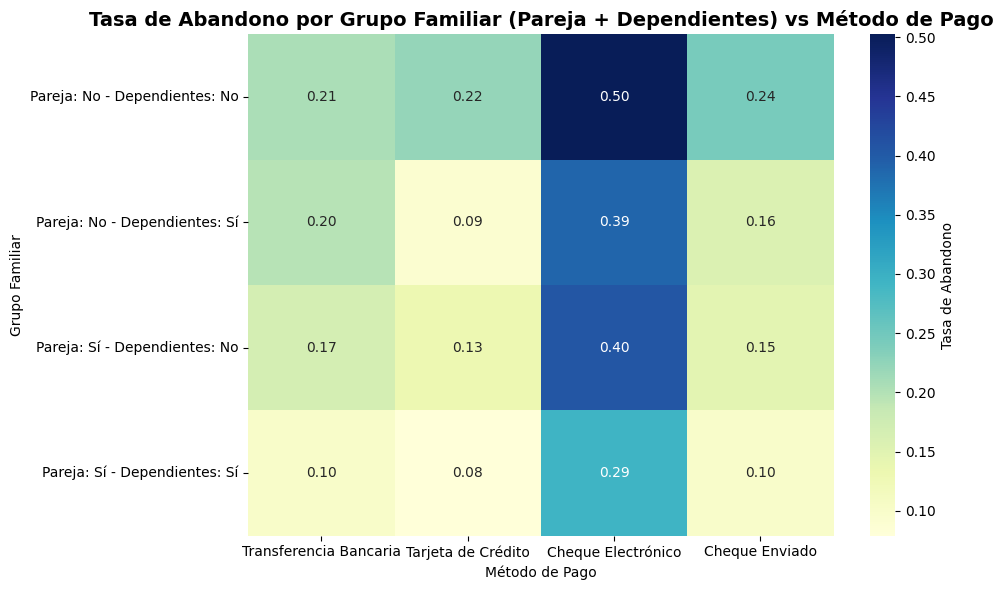

In [33]:
# Tabla cruzada combinando Pareja + Dependientes vs Método de Pago
tabla2 = pd.crosstab(
    [df['Partner'], df['Dependents']],  # Eje Y
    df['PaymentMethod'],                # Eje X
    values=df['Churn'],
    aggfunc='mean'
)

# Traducción de índices
tabla2.index = [f"Pareja: {'Sí' if p==1 else 'No'} - Dependientes: {'Sí' if d==1 else 'No'}"
                for p, d in tabla2.index]

tabla2.columns = (tabla2.columns.str.replace('Electronic check', 'Cheque Electrónico')
                                  .str.replace('Mailed check', 'Cheque Enviado')
                                  .str.replace('Bank transfer (automatic)', 'Transferencia Bancaria')
                                  .str.replace('Credit card (automatic)', 'Tarjeta de Crédito'))

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(tabla2, annot=True, fmt=".2f", cmap="YlGnBu",
            cbar_kws={'label': 'Tasa de Abandono'})
plt.title("Tasa de Abandono por Grupo Familiar (Pareja + Dependientes) vs Método de Pago",
          fontsize=14, weight="bold")
plt.xlabel("Método de Pago")
plt.ylabel("Grupo Familiar")
plt.tight_layout()
plt.show()


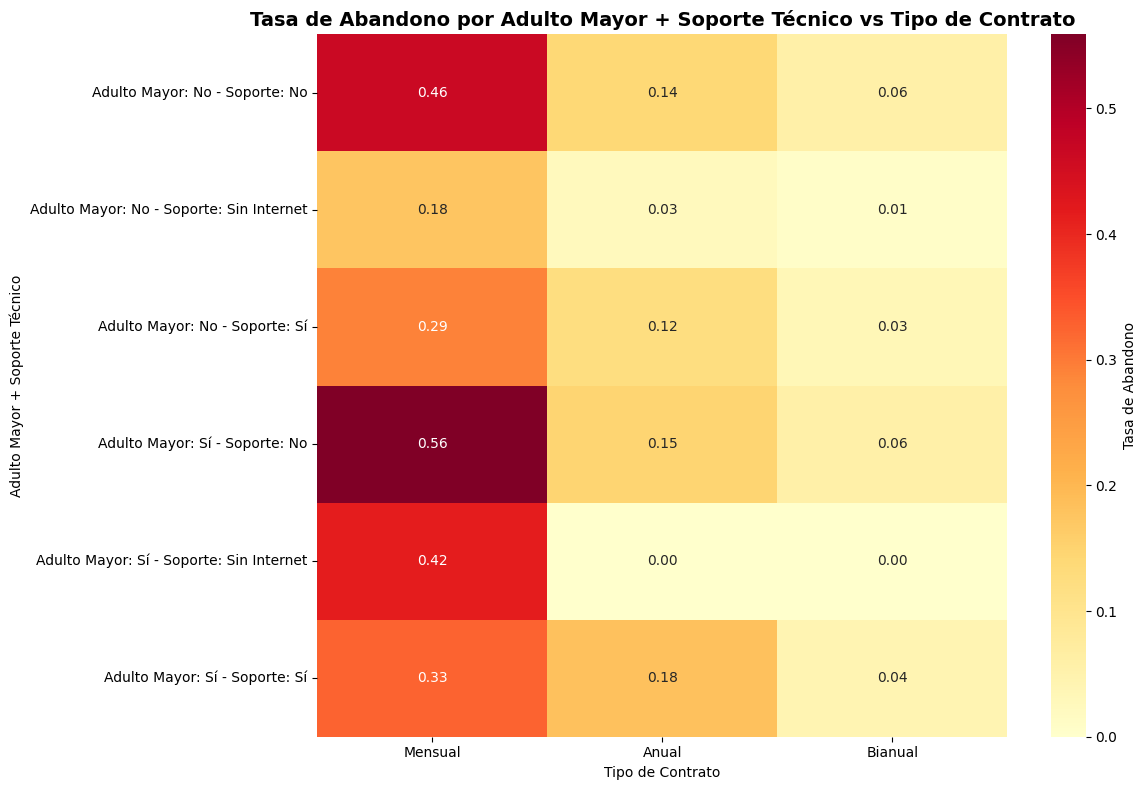

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

colors = sns.color_palette("Set2")

# Tabla cruzada combinando SeniorCitizen + TechSupport vs Contract
tabla = pd.crosstab(
    [df['SeniorCitizen'], df['TechSupport']],  # Eje Y: combinación
    df['Contract'],                             # Eje X
    values=df['Churn'],
    aggfunc='mean'
)

# Traducir índices a español
tabla.index = [f"Adulto Mayor: {'Sí' if s==1 else 'No'} - Soporte: {'Sí' if t=='Yes' else 'No' if t=='No' else 'Sin Internet'}"
               for s, t in tabla.index]

# Traducir columnas
tabla.columns = tabla.columns.str.replace('Month-to-month', 'Mensual') \
                             .str.replace('One year', 'Anual') \
                             .str.replace('Two year', 'Bianual')

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(tabla, annot=True, fmt=".2f", cmap="YlOrRd",
            cbar_kws={'label': 'Tasa de Abandono'})
plt.title("Tasa de Abandono por Adulto Mayor + Soporte Técnico vs Tipo de Contrato",
          fontsize=14, weight="bold")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Adulto Mayor + Soporte Técnico")
plt.tight_layout()
plt.show()


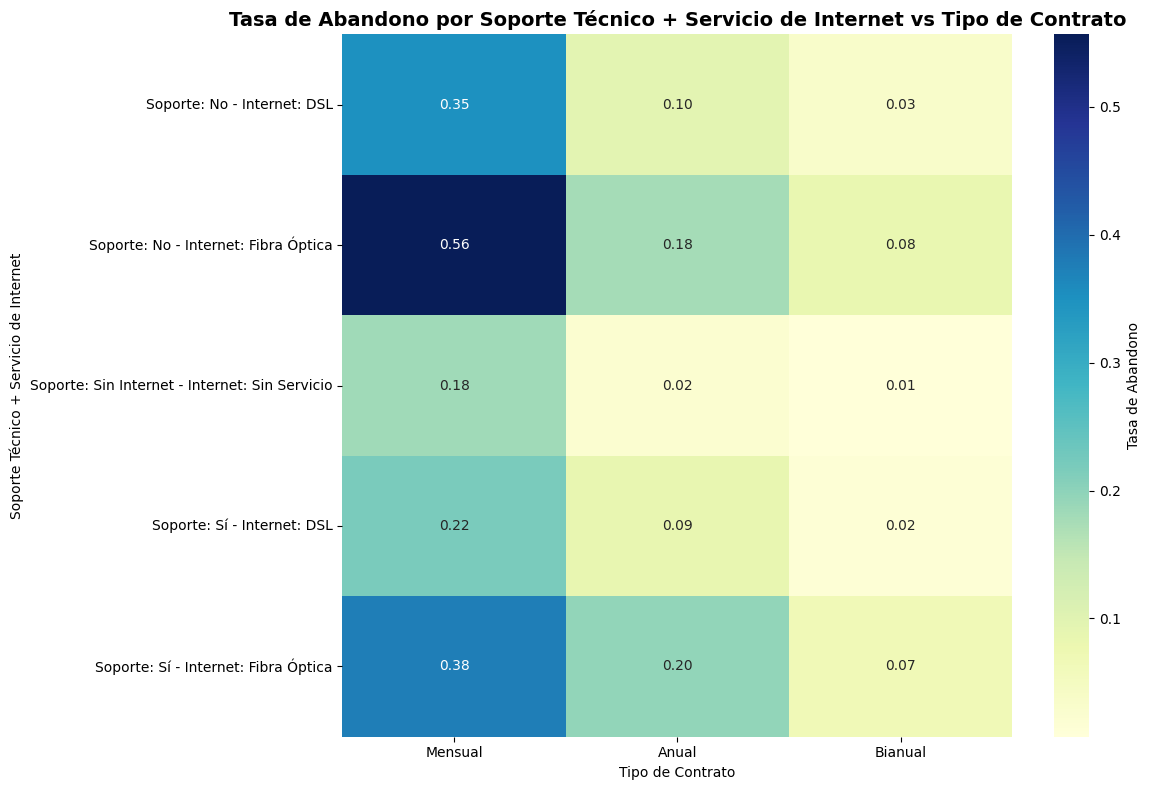

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

colors = sns.color_palette("Set2")

# Tabla cruzada combinando TechSupport + InternetService vs Contract
tabla = pd.crosstab(
    [df['TechSupport'], df['InternetService']],  # Eje Y: combinación
    df['Contract'],                              # Eje X
    values=df['Churn'],
    aggfunc='mean'
)

# Traducir índices a español
tabla.index = [f"Soporte: {'Sí' if t=='Yes' else 'No' if t=='No' else 'Sin Internet'} - Internet: "
               f"{'Fibra Óptica' if i=='Fiber optic' else 'DSL' if i=='DSL' else 'Sin Servicio'}"
               for t, i in tabla.index]

# Traducir columnas
tabla.columns = tabla.columns.str.replace('Month-to-month', 'Mensual') \
                             .str.replace('One year', 'Anual') \
                             .str.replace('Two year', 'Bianual')

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(tabla, annot=True, fmt=".2f", cmap="YlGnBu",
            cbar_kws={'label': 'Tasa de Abandono'})
plt.title("Tasa de Abandono por Soporte Técnico + Servicio de Internet vs Tipo de Contrato",
          fontsize=14, weight="bold")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Soporte Técnico + Servicio de Internet")
plt.tight_layout()
plt.show()


##**Guardar DataFrame**

In [36]:
df.to_csv("datos_tratados.csv", index=False)

#📄Informe final

# **Conclusión Final del Análisis de Fidelización**

## 1️⃣ Contratos y Método de Pago
- Los **contratos mensuales** presentan la **mayor tasa de abandono** en comparación con contratos anuales o bianuales.  
- La tendencia de abandono es más marcada en clientes que usan **Cheque Electrónico** como método de pago.  
- Esto indica que los clientes con pagos flexibles y sin compromiso a largo plazo son más propensos a dejar el servicio.

## 2️⃣ Servicio de Internet
- **Fibra Óptica** concentra más abandono que DSL o sin servicio, especialmente en contratos mensuales y pagos vía Cheque Electrónico.  
- Clientes con **DSL** también presentan riesgo de abandono, aunque menos marcado.

## 3️⃣ Grupo Familiar (Pareja y Dependientes)
- Clientes **sin pareja ni dependientes** muestran hasta **50% de abandono**, el mayor riesgo.  
- Clientes con **dependientes pero sin pareja** presentan alrededor de **40% de abandono**.  
- Clientes con **pareja y dependientes** tienen menor abandono, alrededor de **30%**.  
- Esto indica que **el soporte familiar influye positivamente en la fidelización**.

## 4️⃣ Soporte Técnico y Adulto Mayor
- La **suscripción a soporte técnico** reduce significativamente el riesgo de abandono.  
- Los clientes **sin soporte técnico** presentan mayor abandono, incluso en contratos largos o para adultos mayores.  
- Los contratos mensuales siguen siendo más vulnerables al abandono.

## 5️⃣ Comportamiento según Tenure y Cargos
- **Tenure:** La mayoría de los abandonos ocurre en los primeros 2-3 años, aunque hay algunos clientes de largo plazo que también abandonan.  
- **Cargos Mensuales:** Los clientes que pagan más mensualmente tienen mayor riesgo de abandono.  
- **Total Gastado:** Los clientes que abandonan generalmente tienen menor gasto total acumulado, lo que refleja menor fidelidad por tiempo de permanencia.

## 6️⃣ Insights Generales
- **Factores de riesgo más importantes para la evasión:**
  - Contratos mensuales.
  - Pago por Cheque Electrónico.
  - Fibra Óptica sin soporte técnico.
  - Clientes sin grupo familiar (sin pareja ni dependientes).
  - Gasto mensual alto con tenure bajo.
- **Factores de protección o fidelización:**
  - Contratos anuales o bianuales.
  - Suscripción a soporte técnico.
  - Presencia de pareja o dependientes.
  - Tenure más largo y gasto acumulado mayor.

## 💡 Recomendaciones
1. Incentivar **contratos más largos** para nuevos clientes o quienes usan pagos electrónicos.  
2. Ofrecer **beneficios de soporte técnico** y soporte adicional para clientes de alto riesgo.  
3. Analizar **planes diferenciados de fidelización** para clientes con Fibra Óptica y Cheque Electrónico.  
4. Monitorear los **primeros meses de servicio**, que son críticos para la retención.  
5. Crear estrategias de **engagement familiar** o paquetes que beneficien a clientes con grupo familiar.